<a href="https://colab.research.google.com/github/geee05/ARIMA/blob/main/Case_Study_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [ ]:
data=pd.read_csv('covid_19_clean_complete (11).csv',parse_dates=['Date'])

In [ ]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [ ]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data.tail()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [ ]:
#To find all the cases on last value in date
top=data[data['date']==data['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
data['date'].max()

Timestamp('2020-07-27 00:00:00')

In [ ]:
w=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()

In [ ]:
w

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41
...,...,...,...,...
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140


In [ ]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

(array([-2500000.,        0.,  2500000.,  5000000.,  7500000., 10000000.,
        12500000., 15000000., 17500000.]),
 [Text(0, -2500000.0, '−0.25'),
  Text(0, 0.0, '0.00'),
  Text(0, 2500000.0, '0.25'),
  Text(0, 5000000.0, '0.50'),
  Text(0, 7500000.0, '0.75'),
  Text(0, 10000000.0, '1.00'),
  Text(0, 12500000.0, '1.25'),
  Text(0, 15000000.0, '1.50'),
  Text(0, 17500000.0, '1.75')])

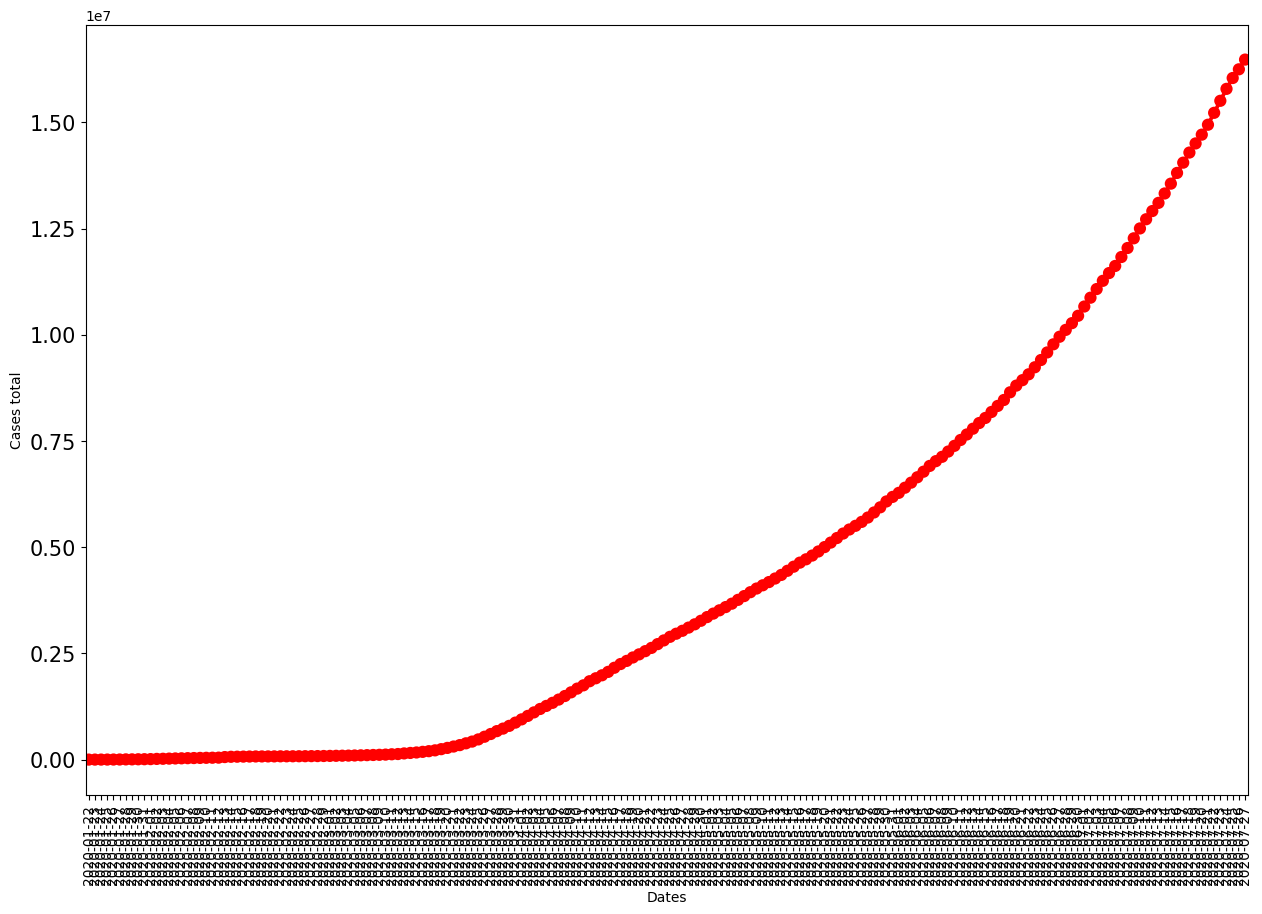

In [ ]:
#pointplot

#plot for confirmed cases

plt.figure(figsize=(15,10))
t_cases=data.groupby('date')['confirmed'].sum().reset_index()
#t_cases
t_cases['date']=pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases['date'].dt.date,y=t_cases['confirmed'],color='r')
a.set(xlabel='Dates',ylabel='Cases total')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)



In [ ]:
#Top 20 countries having most active cases
t_actives=top.groupby('country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'US'),
  Text(0, 1, 'Brazil'),
  Text(0, 2, 'India'),
  Text(0, 3, 'United Kingdom'),
  Text(0, 4, 'Russia'),
  Text(0, 5, 'South Africa'),
  Text(0, 6, 'Colombia'),
  Text(0, 7, 'France'),
  Text(0, 8, 'Canada'),
  Text(0, 9, 'Peru'),
  Text(0, 10, 'Bangladesh'),
  Text(0, 11, 'Spain'),
  Text(0, 12, 'Argentina'),
  Text(0, 13, 'Sweden'),
  Text(0, 14, 'Philippines'),
  Text(0, 15, 'Egypt'),
  Text(0, 16, 'Mexico'),
  Text(0, 17, 'Netherlands'),
  Text(0, 18, 'Bolivia'),
  Text(0, 19, 'Saudi Arabia')])

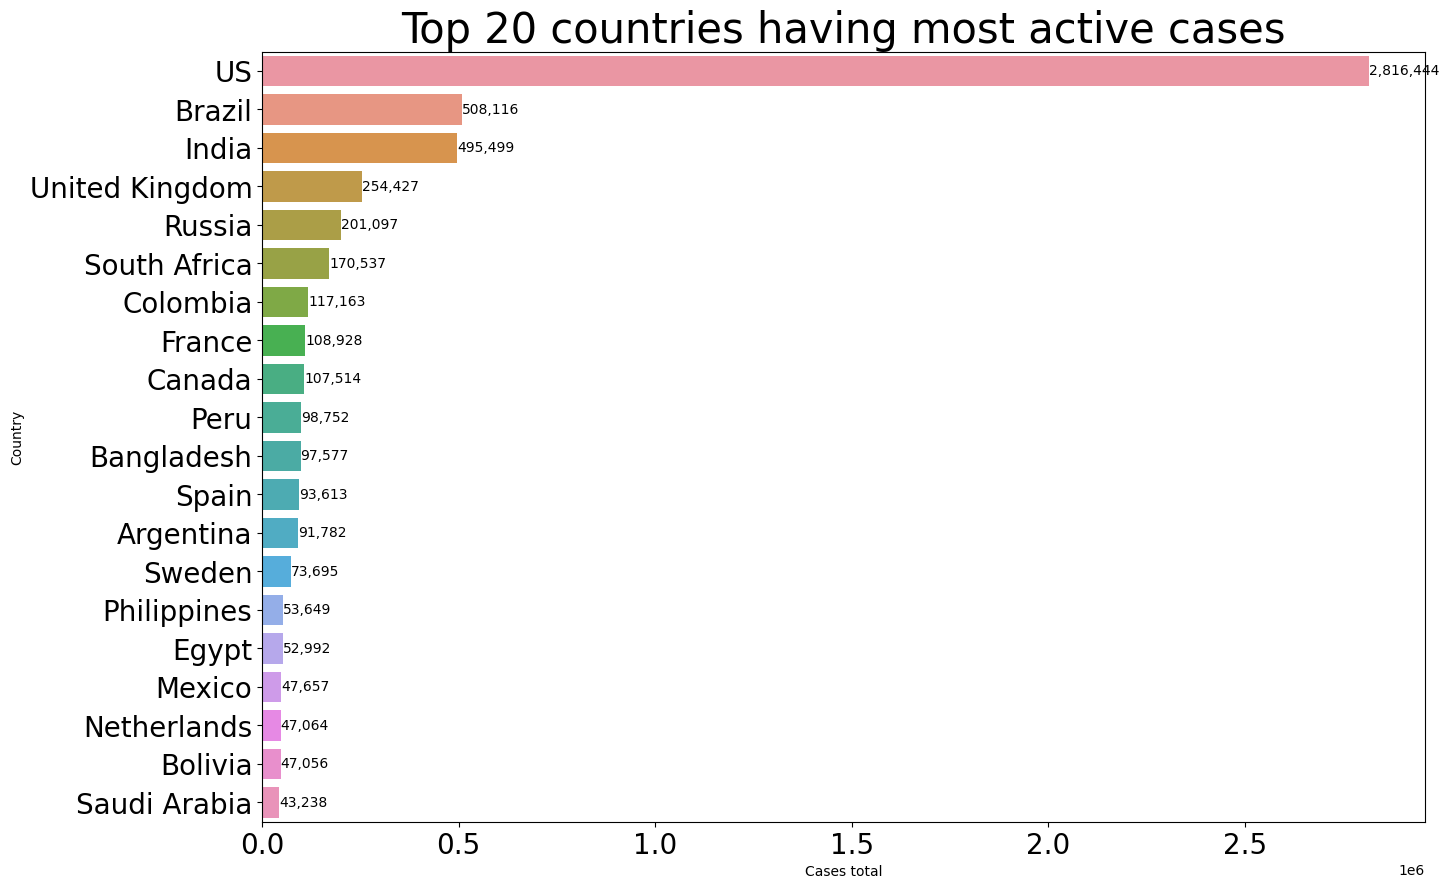

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
a=sns.barplot(x=t_actives.active,y=t_actives.country)

#for i,j in enumerate():

for i,(value,name) in enumerate(zip(t_actives.active,t_actives.country)):
    a.text(value,i,f'{value:,.0f}',size=10,ha='left',va='center')

a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [ ]:
#Top 20 countries having most death
t_deaths=top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
t_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'US'),
  Text(0, 1, 'Brazil'),
  Text(0, 2, 'United Kingdom'),
  Text(0, 3, 'Mexico'),
  Text(0, 4, 'Italy'),
  Text(0, 5, 'India'),
  Text(0, 6, 'France'),
  Text(0, 7, 'Spain'),
  Text(0, 8, 'Peru'),
  Text(0, 9, 'Iran'),
  Text(0, 10, 'Russia'),
  Text(0, 11, 'Belgium'),
  Text(0, 12, 'Chile'),
  Text(0, 13, 'Germany'),
  Text(0, 14, 'Canada'),
  Text(0, 15, 'Colombia'),
  Text(0, 16, 'South Africa'),
  Text(0, 17, 'Netherlands'),
  Text(0, 18, 'Pakistan'),
  Text(0, 19, 'Sweden')])

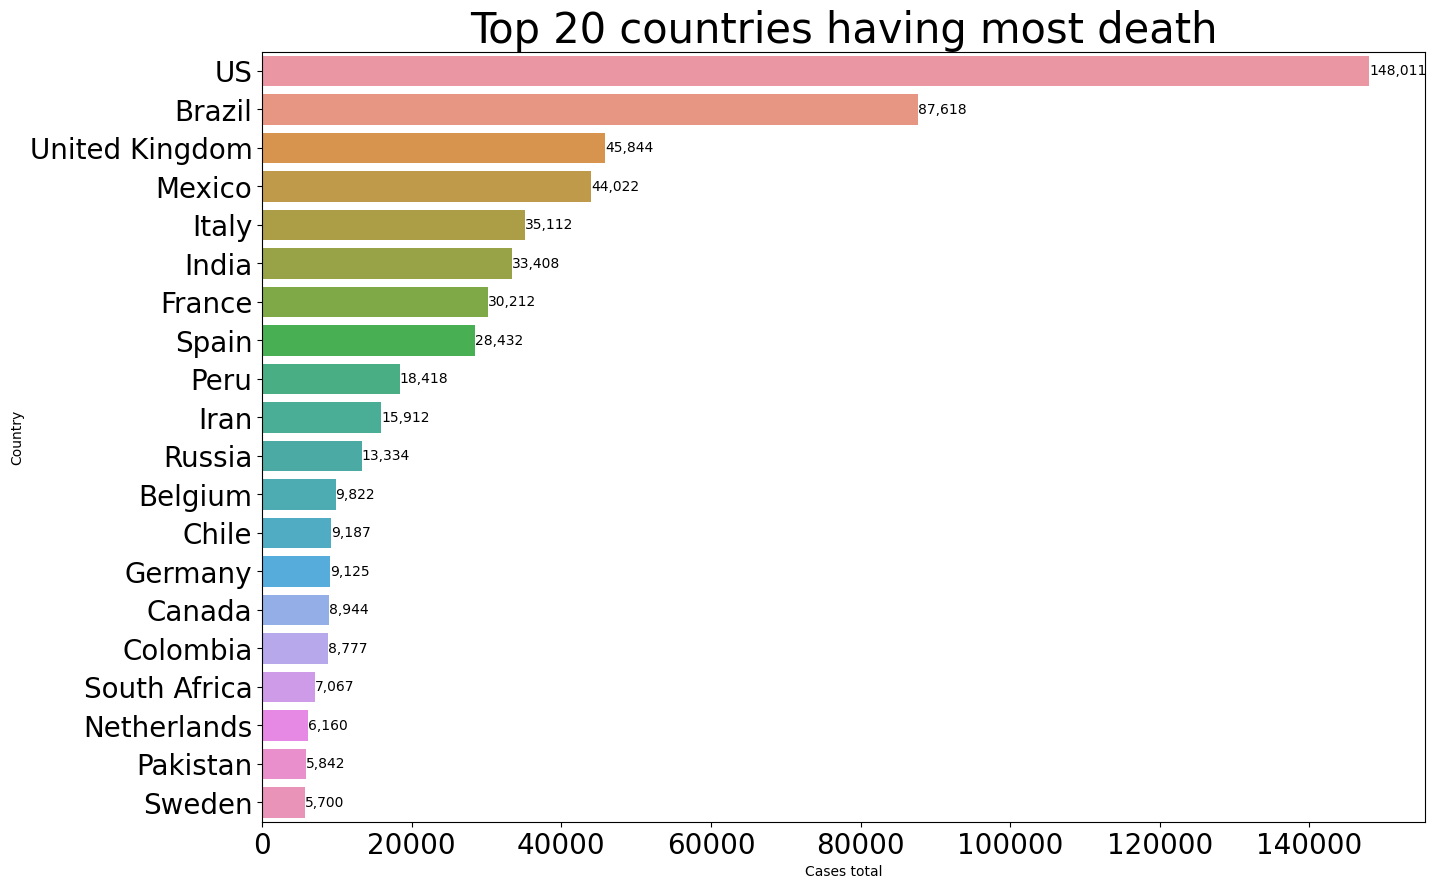

In [ ]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most death',fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)

for i,(value,name) in enumerate(zip(t_deaths.deaths,t_deaths.country)):
    a.text(value,i,f'{value:,.0f}',size=10,ha='left',va='center')

a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

##FB Prophet

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [ ]:
confirmed = data.groupby('date').sum()['confirmed'].reset_index()
confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
deaths = data.groupby('date').sum()['deaths'].reset_index()
deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
recovered = data.groupby('date').sum()['recovered'].reset_index()
recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 70.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826676 sha256=5ab2c1f71b7a4cd54928c487b0b899cf37a8ae1d6391b60f5f2bac57caa7098e
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436152 sha256=a715573f6f7d18983e093fdfec474c80b1d017a87cdc3c756f19bcfc3c562d8b
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
from fbprophet import Prophet
import pandas as pd

#Forecast on confirmed cases

In [ ]:
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
m = Prophet() 
m.fit(confirmed) #training

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=7,freq='D')
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674799e+07,1.664478e+07,1.685417e+07
191,2020-07-31,1.696338e+07,1.685802e+07,1.706943e+07
192,2020-08-01,1.717124e+07,1.706445e+07,1.727880e+07
193,2020-08-02,1.736898e+07,1.725783e+07,1.747923e+07
194,2020-08-03,1.756378e+07,1.744492e+07,1.768870e+07


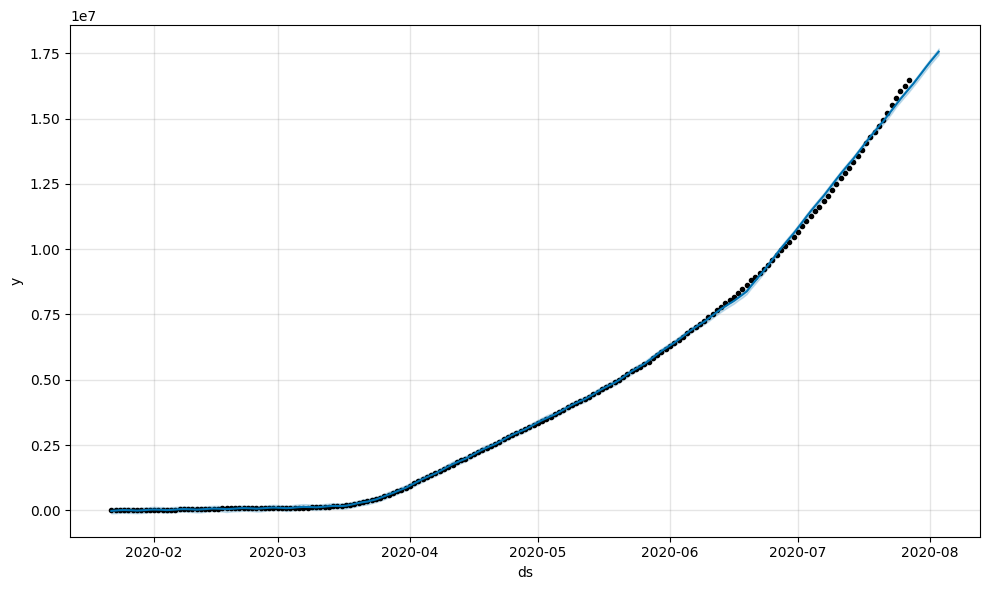

In [ ]:
#Forecasting on confirmed cases
confirmed_forecast_plot = m.plot(forecast)

In [ ]:
#Forecast on Death cases

In [ ]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=14)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
197,2020-08-06,698733.476780,695055.046696,703565.711270
198,2020-08-07,704250.344438,700001.130956,709775.608441
199,2020-08-08,709133.647633,704015.979683,715145.514750
200,2020-08-09,713272.003626,707222.643805,720256.395208
201,2020-08-10,717563.563343,711010.161862,725381.636111


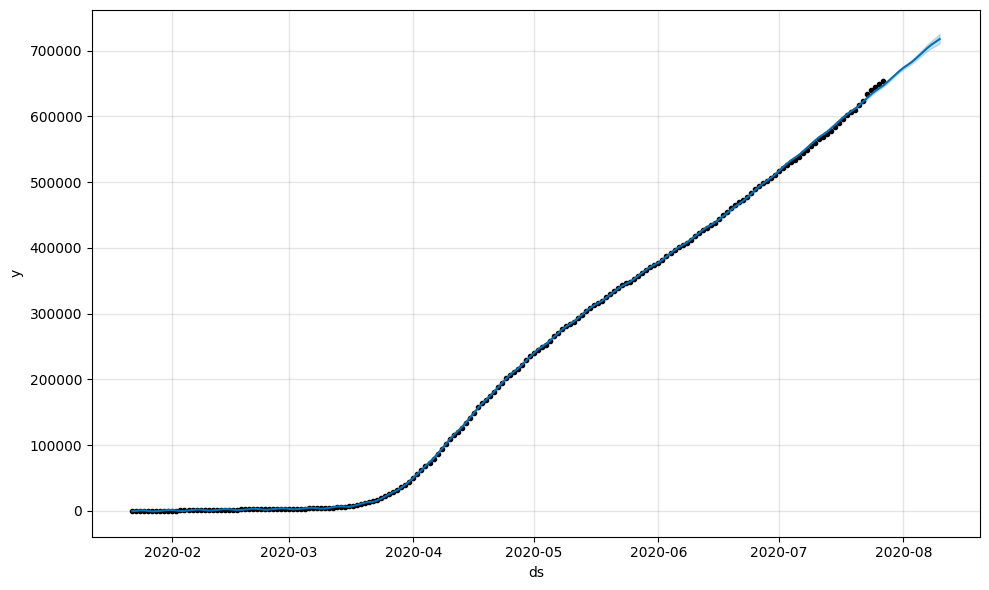

In [ ]:
deaths_forecast_plot = m.plot(forecast)